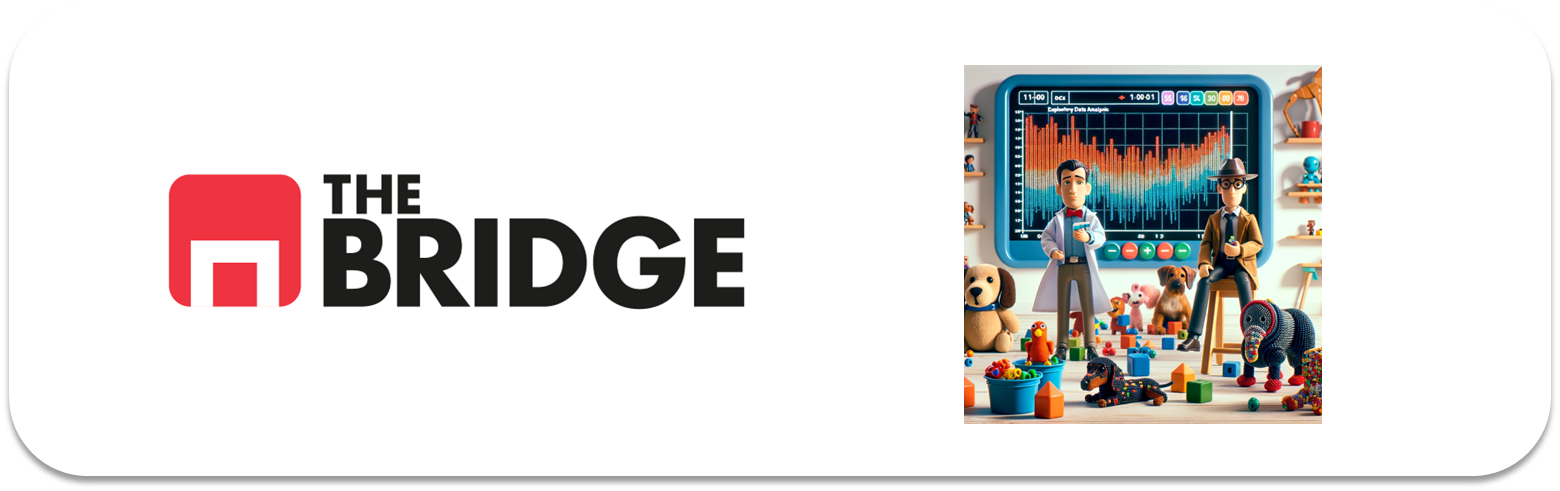

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [6]:
df = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [7]:
df = df.drop(["deck", "survived", "pclass","embarked"], axis = 1)
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [10]:
df["family_members"] = df.parch + df.sibsp
df = df.drop(["parch","sibsp"], axis = 1)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [11]:
mode_emb = df.embark_town.mode()[0]
df.embark_town.mode = df.embark_town.fillna(mode_emb)

In [12]:
df.embark_town.info()


<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embark_town
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [13]:
es_woman = df.who == "woman"
es_child = df.who == "child"
es_man = df.who == "man"
mediana_woman = df.loc[es_woman,"age"].median()
mediana_child = df.loc[es_child,"age"].median()
mediana_man = df.loc[es_man,"age"].median()
es_age_nulo = df.age.isna()
df.loc[es_woman & es_age_nulo, "age"] = mediana_woman
df.loc[es_child & es_age_nulo, "age"] = mediana_child
df.loc[es_man & es_age_nulo, "age"] = mediana_man

In [15]:
df.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [52]:
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms, grafico_dispersion_con_correlacion

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

**1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos?  
¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?  
¿Y entre ser adulto o ser niño?**

En términos absolutos sobrevivieron muchas más mujeres que hombres y ninños (205 frente a 88 y 49 respectivamente). En términos relativos sobrervivieron el 76% de mujeres, el 59% de los niños y sólo el 16% de los hombres. El test chi-2 nos confirma que existe una relación estadística entre las dos variables categóricas (p << 0.05).



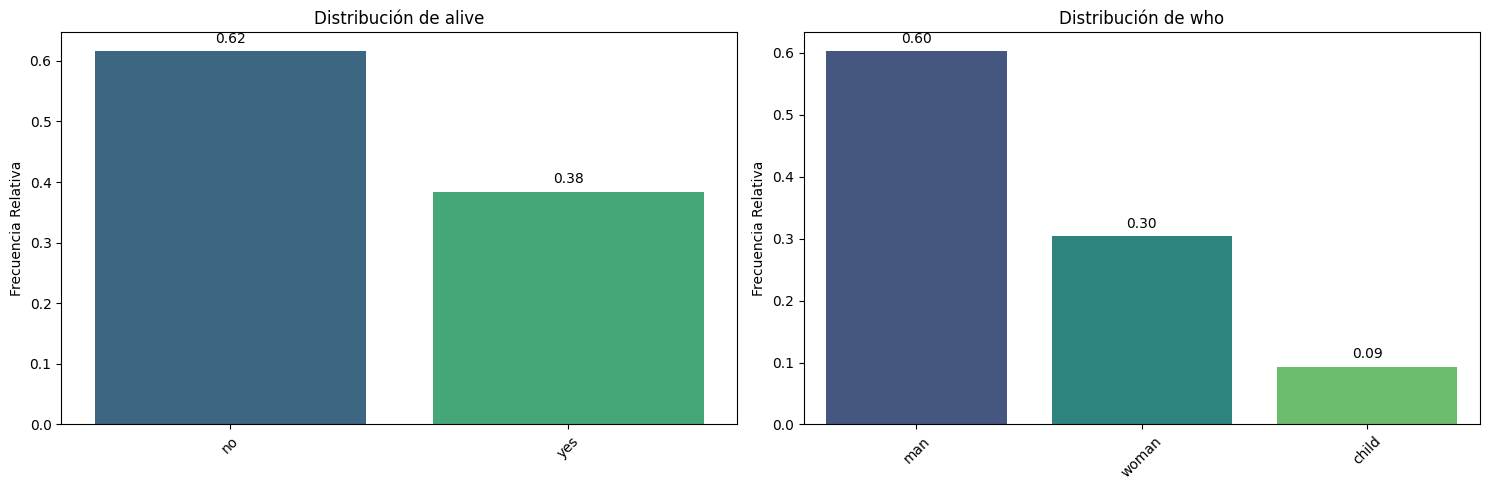

In [18]:
pinta_distribucion_categoricas(df,["alive","who"], relativa= True, mostrar_valores= True)

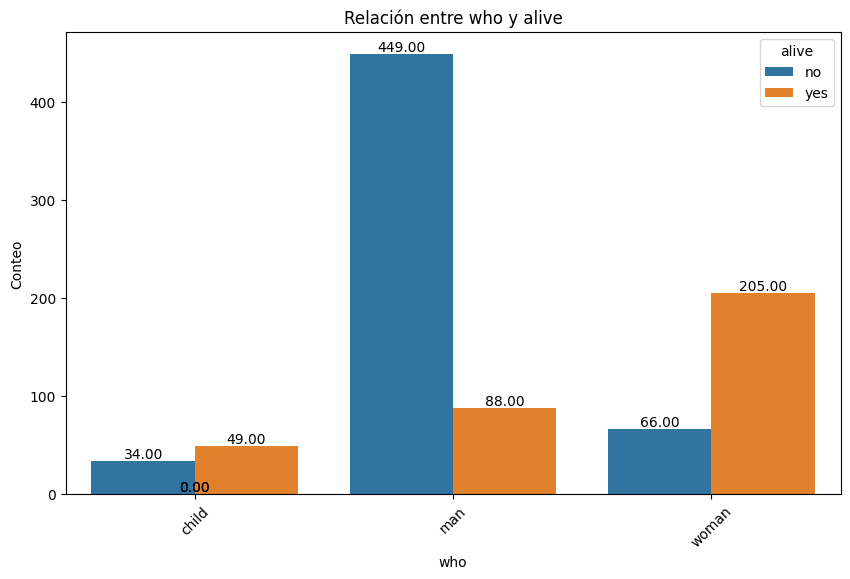

In [19]:
plot_categorical_relationship_fin(df, "who","alive", show_values= True)

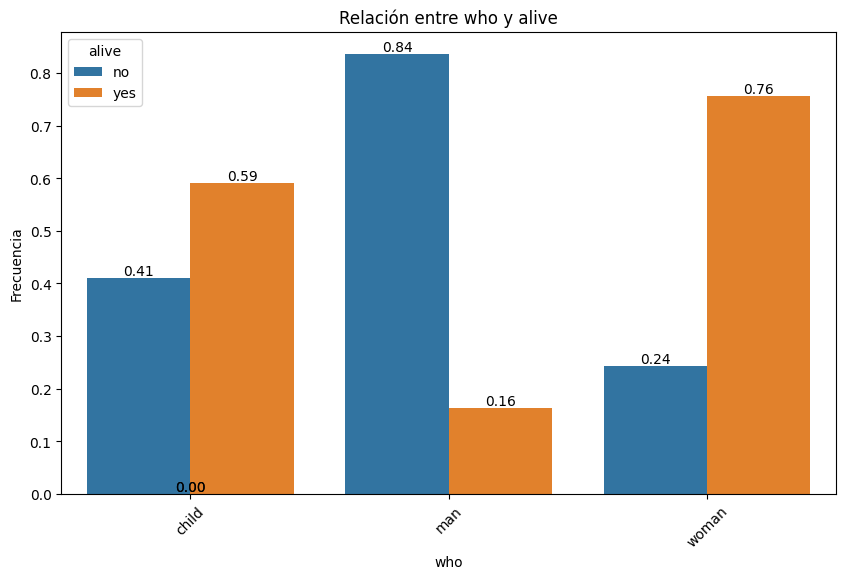

In [22]:
plot_categorical_relationship_fin(df, "who","alive", relative_freq = True,show_values= True)

In [44]:
tabla_contingencia = pd.crosstab(df['alive'], df['who'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


**2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos?  
¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?**

En términos absolutos sobrevivieron 136 pasajeros de 1a clase (63%), 87 de 2a (47%) y 119 de 3a (24%). El test chi-2 nos confirma que existe una relación estadística entre las dos variables categóricas (p << 0.05).

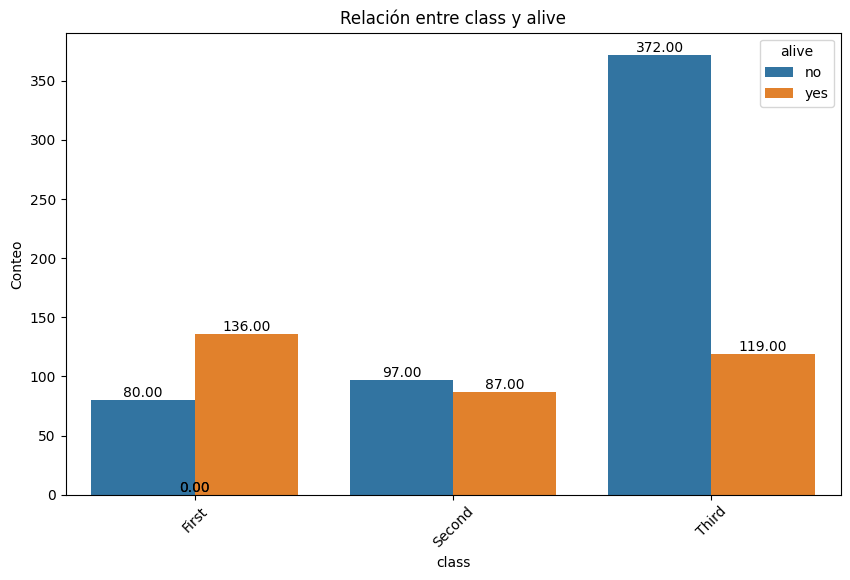

In [27]:
plot_categorical_relationship_fin(df, "class","alive", show_values= True)

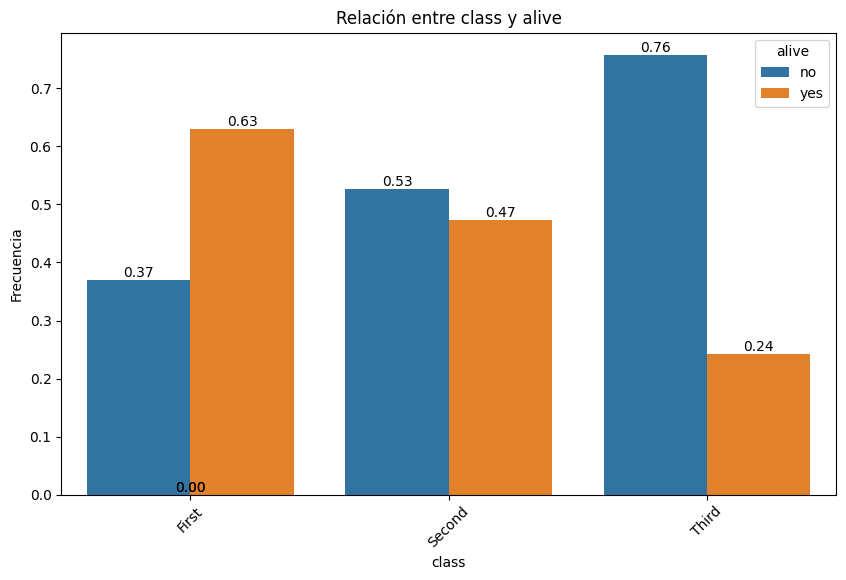

In [28]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq = True,show_values= True)

In [29]:
tabla_contingencia = pd.crosstab(df['alive'], df['class'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


**3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas?  
¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?**

En términos absolutos sobrevivieron 93 pasajeros de Cherbourg (55%), 30 de Queenstown (39%) y 217 de Southampton (34%). El test chi-2 nos confirma que existe una relación estadística entre las dos variables categóricas (p << 0.05).

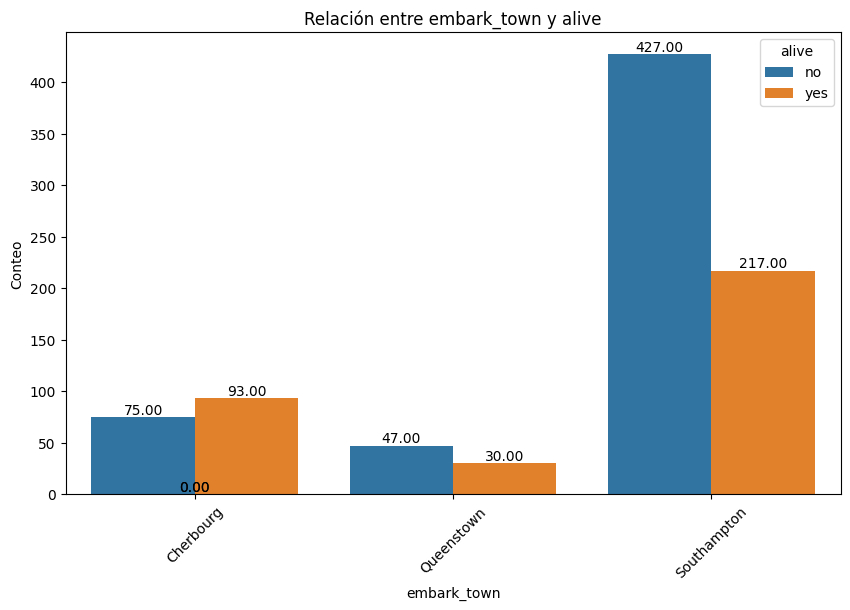

In [31]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True)

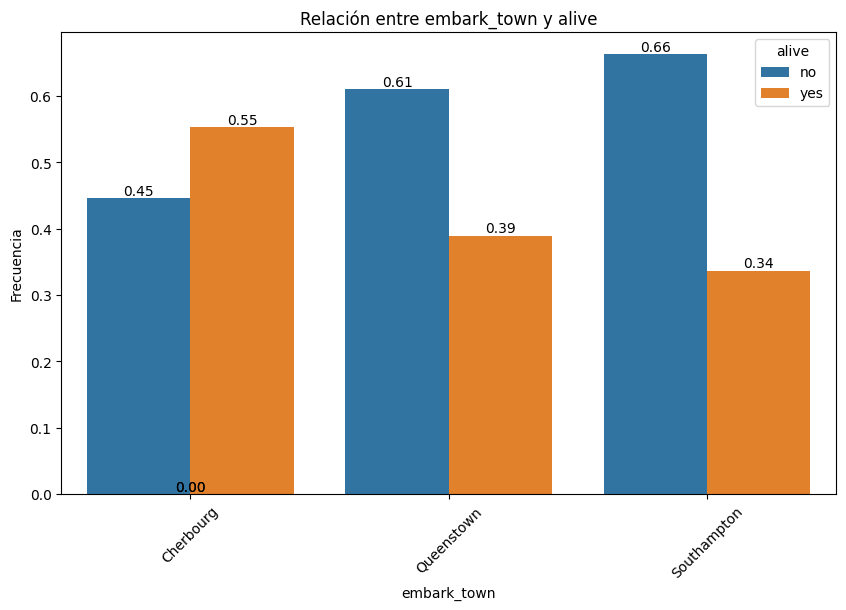

In [32]:
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq=True, show_values= True)

In [33]:
tabla_contingencia = pd.crosstab(df['alive'], df['embark_town'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


**4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?**

Hay una relación muy directa, ya que si comparamos las medianas, los que sobrevivieron pagaron entorno a 10$, osea que debían ser de clase baja y estar en peores condiciones y partes más vulnerables del buque. En cambio, los superviviente pagaraon más de 25$ de mediana, así que sus condiciones debían ser bastante mejores. Con lo cuartiles también vemos que el 50% de los no supervivientes pagaron entre 7 y 26 dólares, mientras que los supervivientes pagaron entre 26 y 57 $. El histograma no los confirma aún más, ya que la cola se alarga más allá de los 100 dólares.

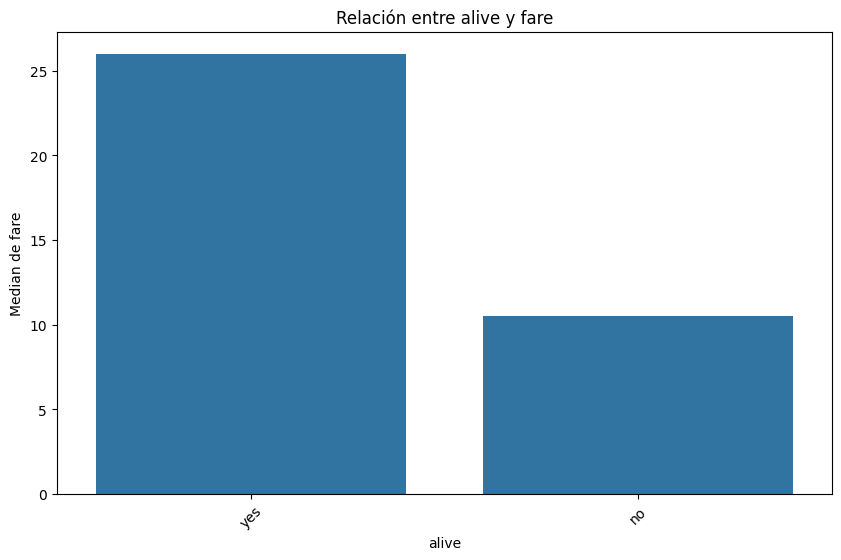

In [43]:
plot_categorical_numerical_relationship(df,"alive","fare", measure = "median")

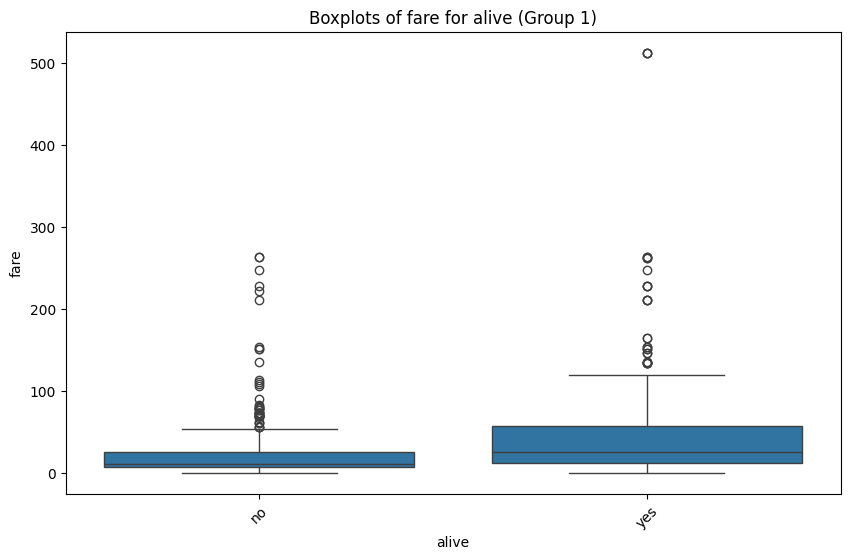

In [37]:
plot_grouped_boxplots(df,"alive","fare")

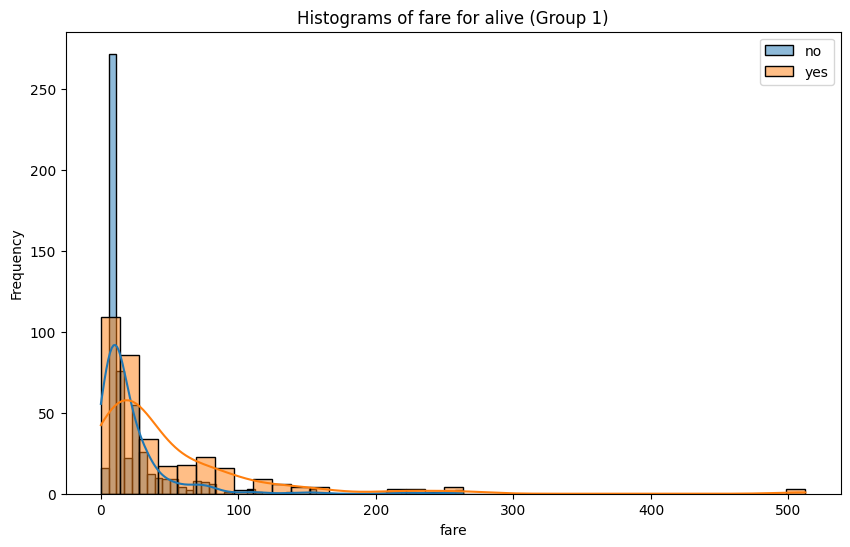

In [38]:
plot_grouped_histograms(df,"alive", "fare", 2)

In [39]:
df_seguros.groupby("alive")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


**5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?**  

Hay 15 hombres, de diferentes clases y diferentes edades, que subieron todos en Southampton y estaban solos, así que parecen ser polizones.

La persona que más pagó (512$) fue una mujer de 35 años de primera clase que subió en Cherbourg e iba sola. Por supuesto, sobrevivió.


In [46]:
polizones = df.loc[df["fare"] == 0]
polizones

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.0,0.0,First,man,True,Southampton,no,True,0
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0
277,male,30.0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0
413,male,30.0,0.0,Second,man,True,Southampton,no,True,0
466,male,30.0,0.0,Second,man,True,Southampton,no,True,0
481,male,30.0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0
633,male,30.0,0.0,First,man,True,Southampton,no,True,0


In [47]:
polizones.describe()

,age,fare,family_members
count,15.000000,15.0,15.0
mean,32.400000,0.0,0.0
std,7.079144,0.0,0.0
min,19.000000,0.0,0.0
25%,30.000000,0.0,0.0
50%,30.000000,0.0,0.0
75%,37.000000,0.0,0.0
max,49.000000,0.0,0.0


In [49]:
df.loc[df["fare"].idxmax()]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

**6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.**

In [57]:
columnas = ["alive","fare","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


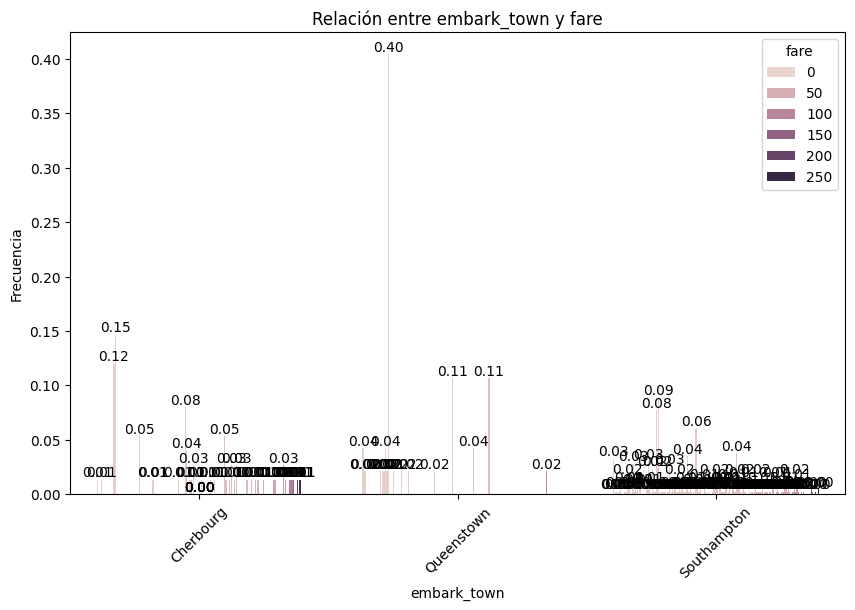

Respuesta yes:


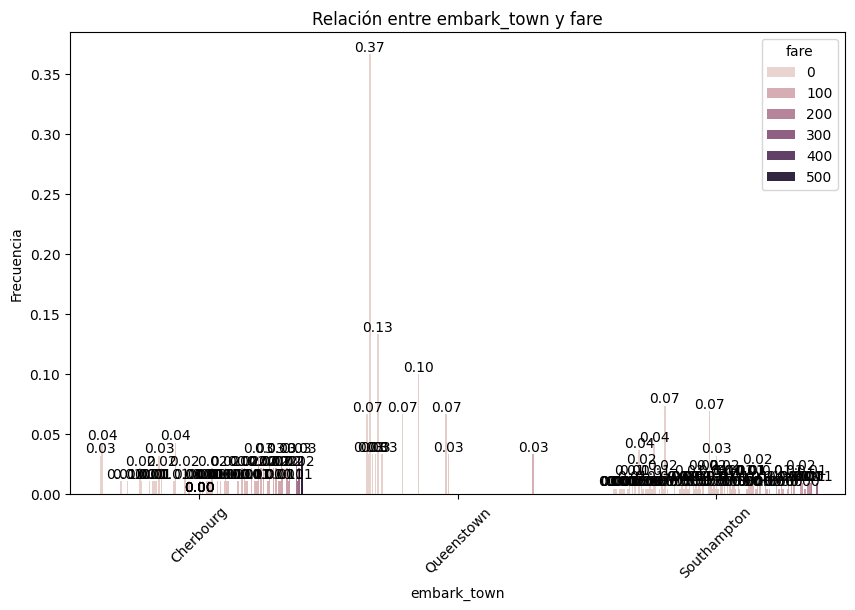

In [58]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

**7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros.  
¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?**

In [62]:
col_directora = "alive"
col_1 = "class"
col_2 = "age"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


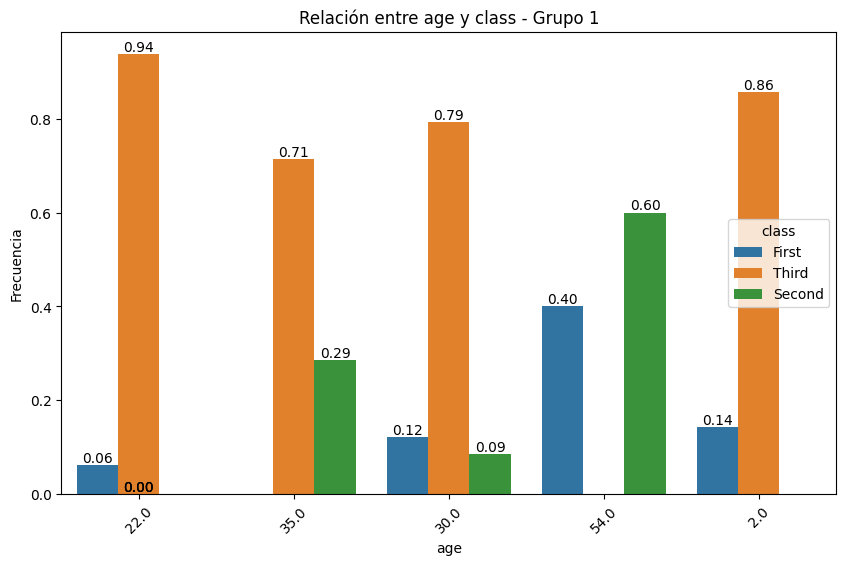

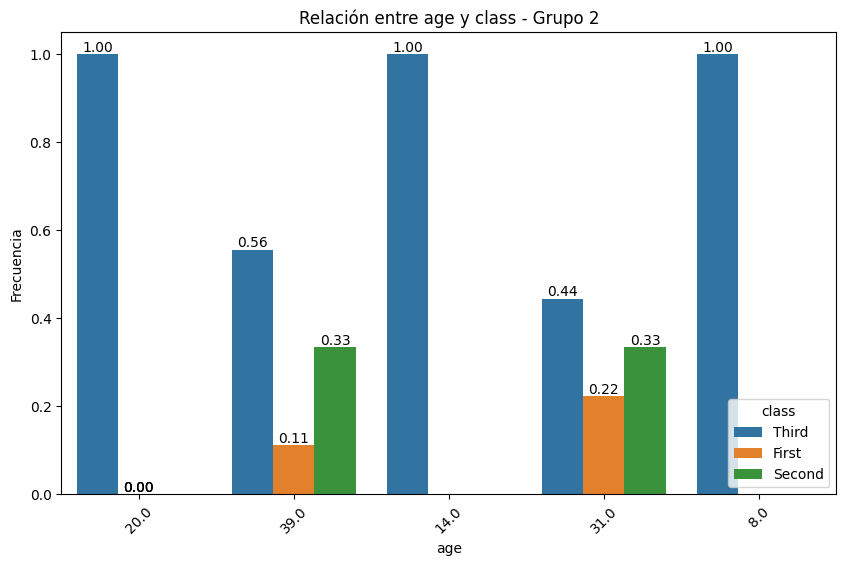

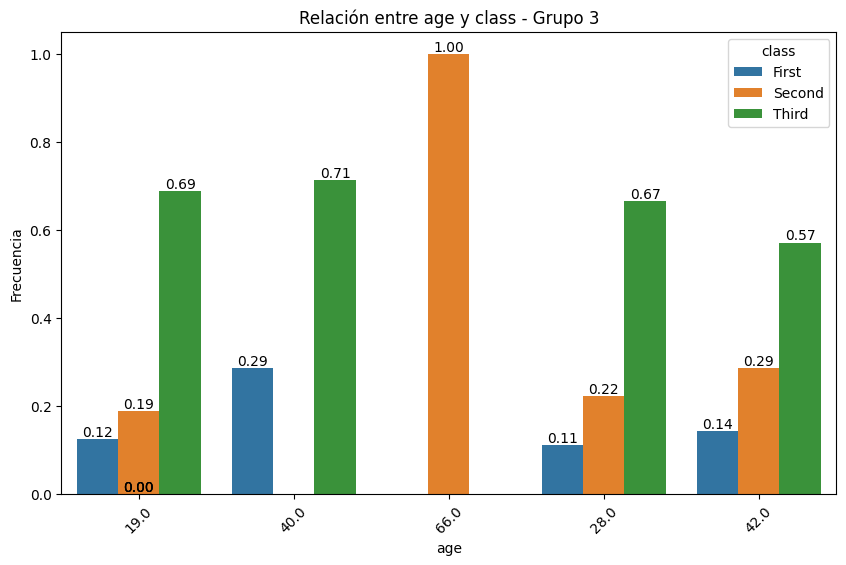

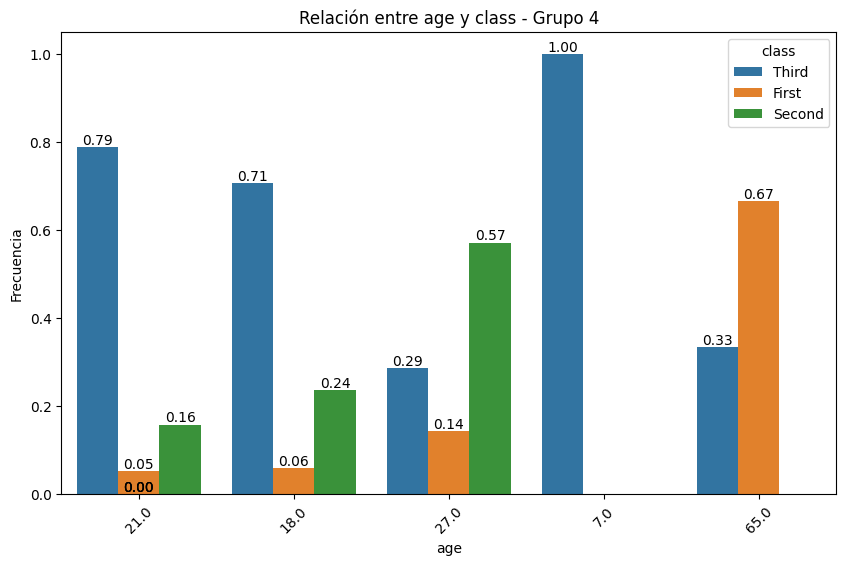

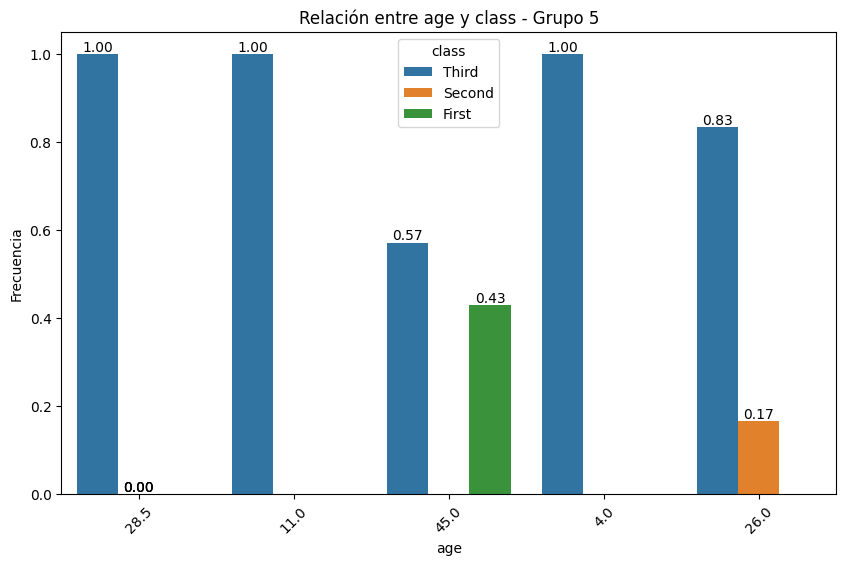

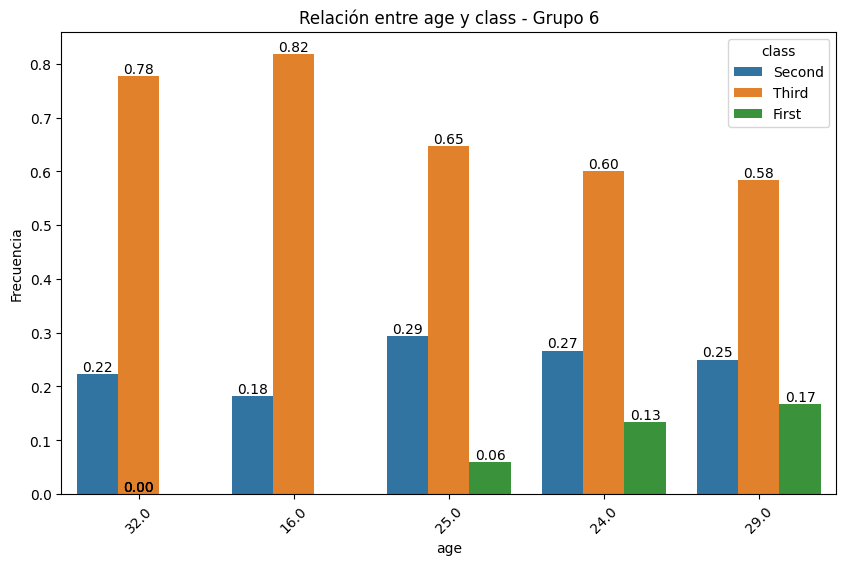

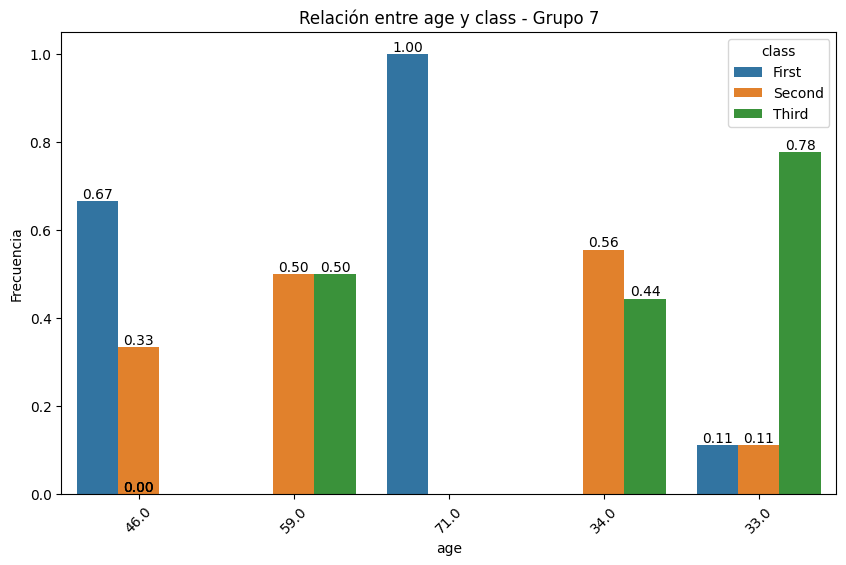

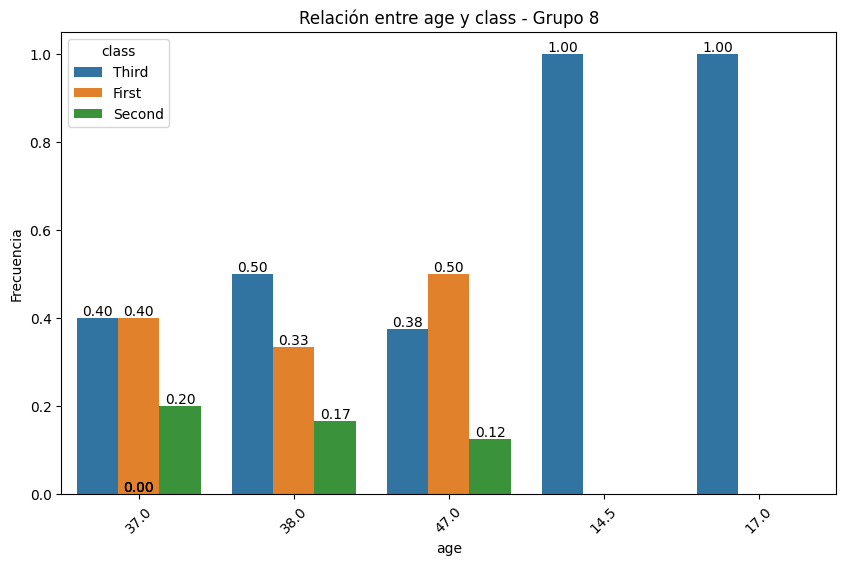

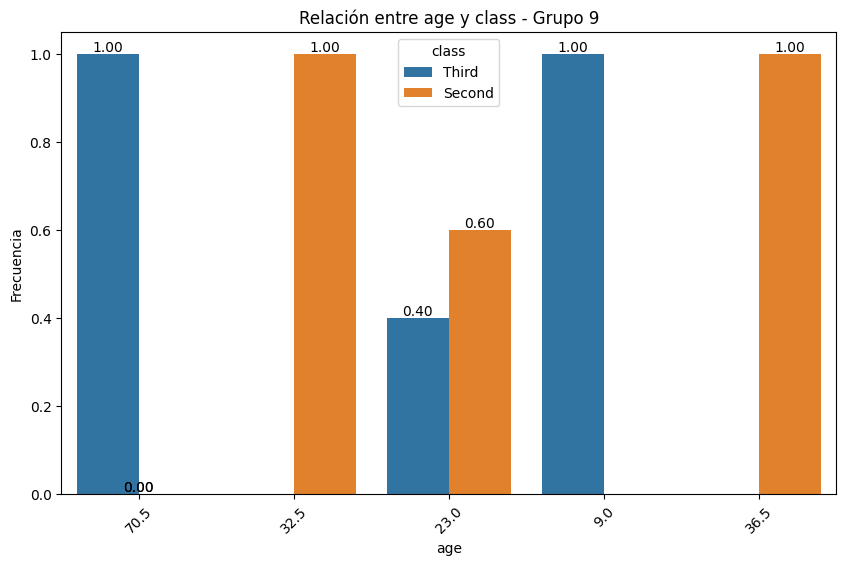

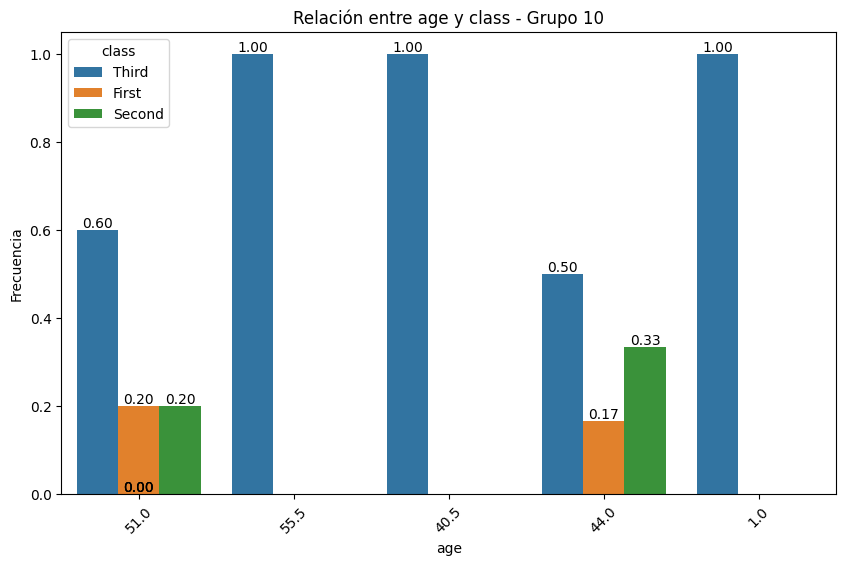

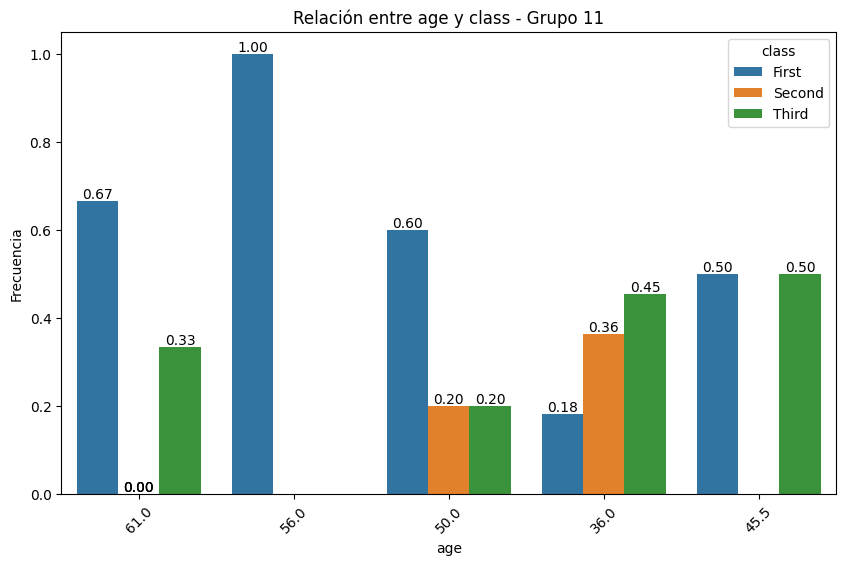

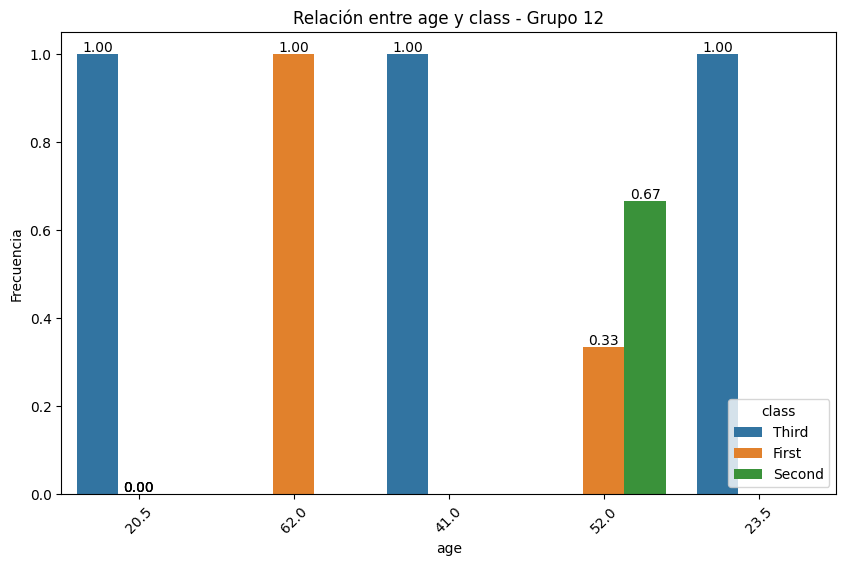

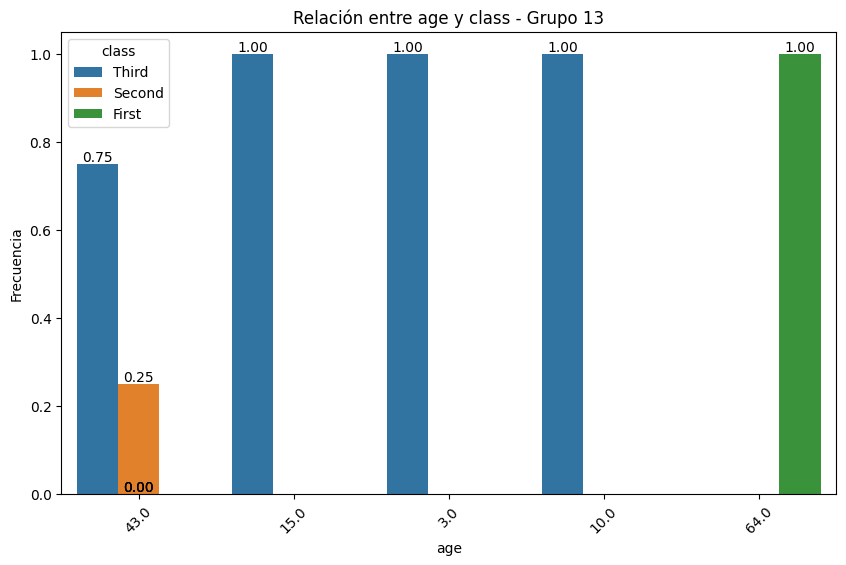

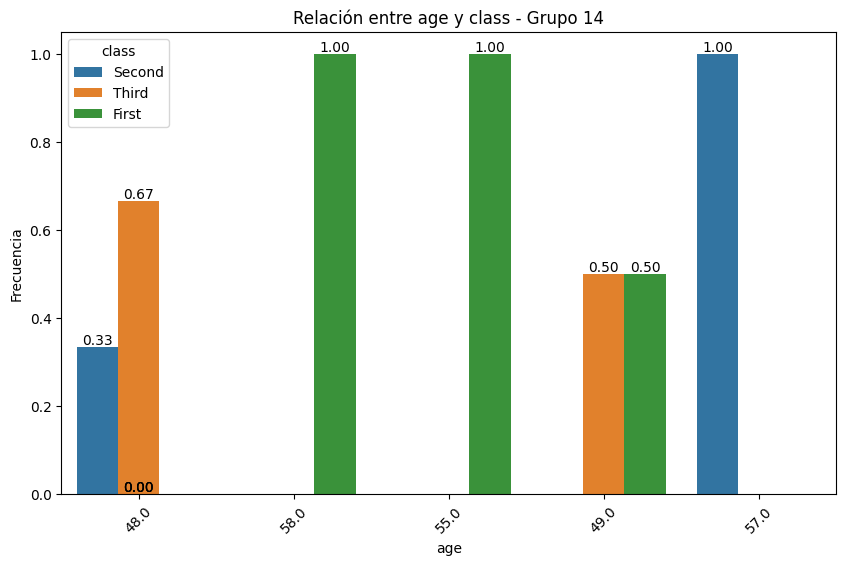

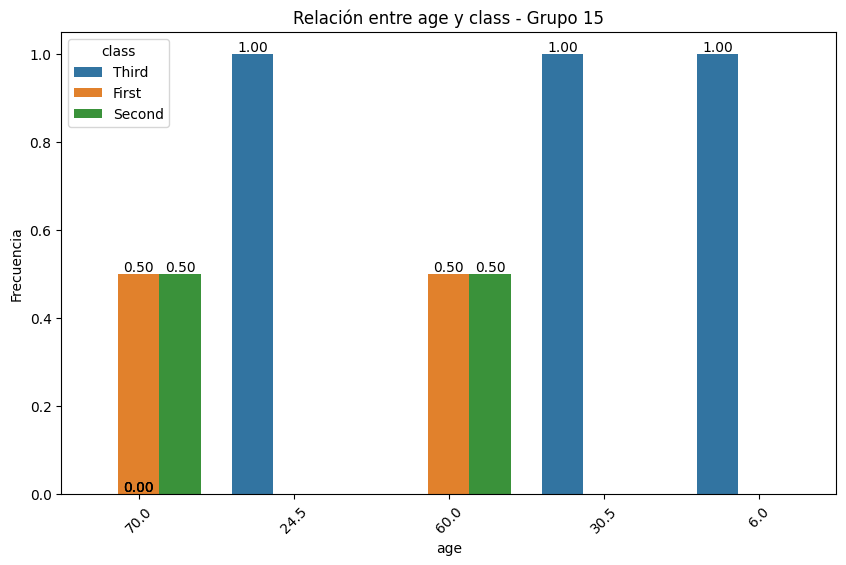

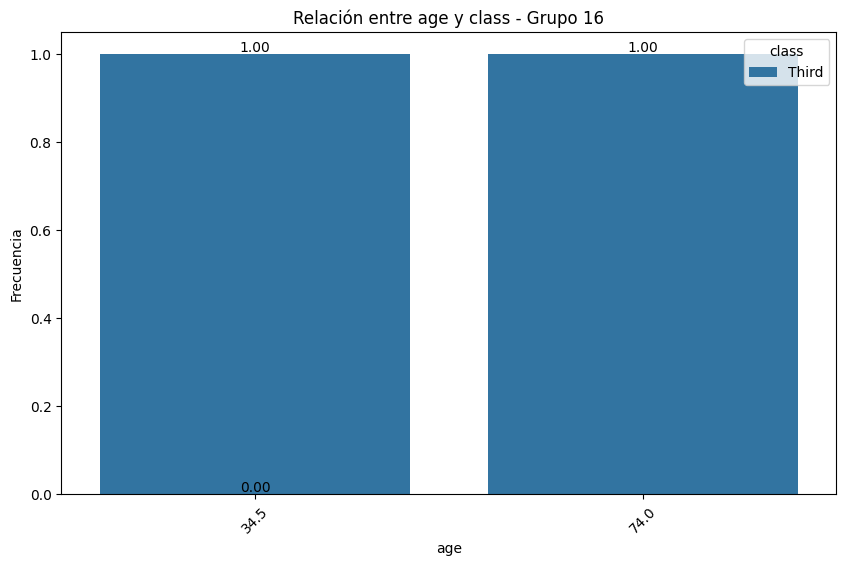

Respuesta yes:


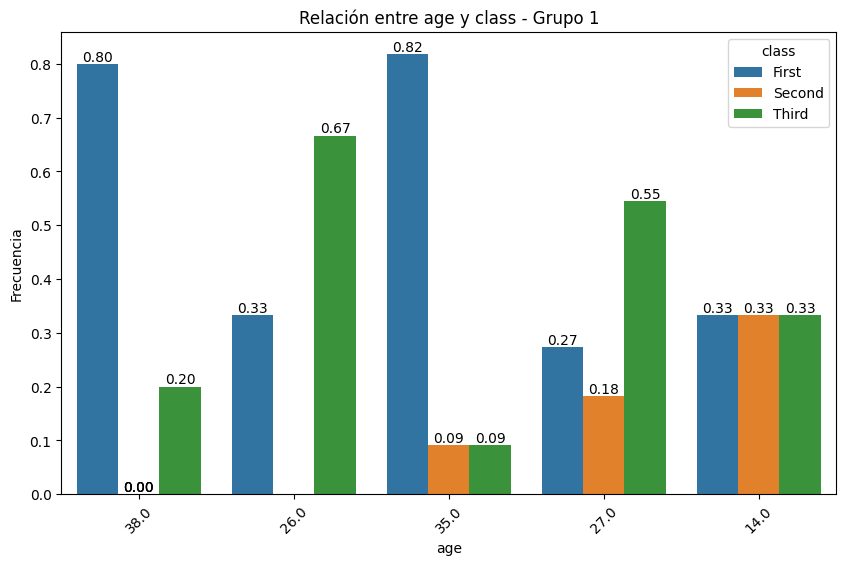

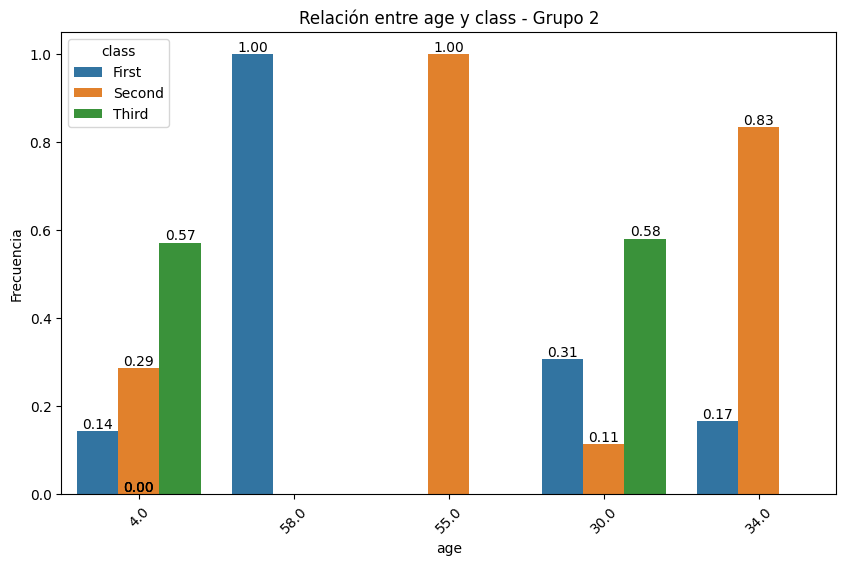

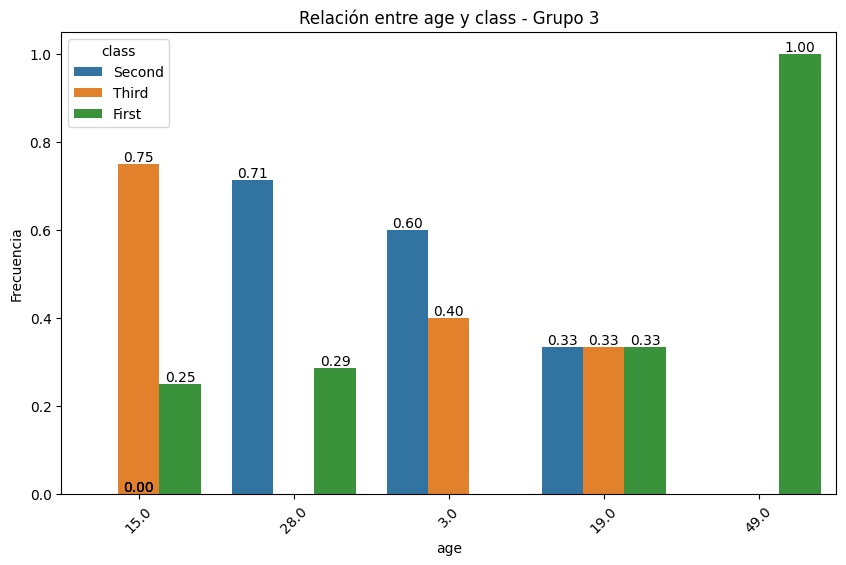

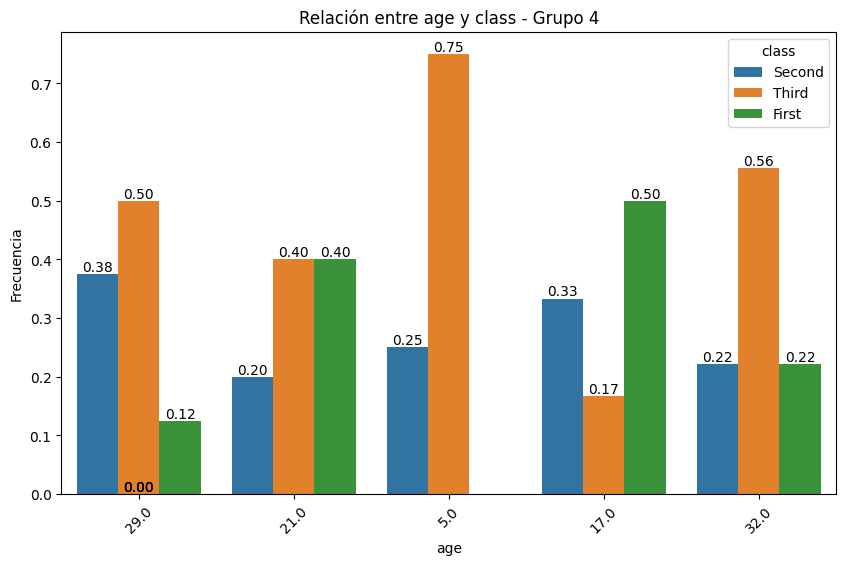

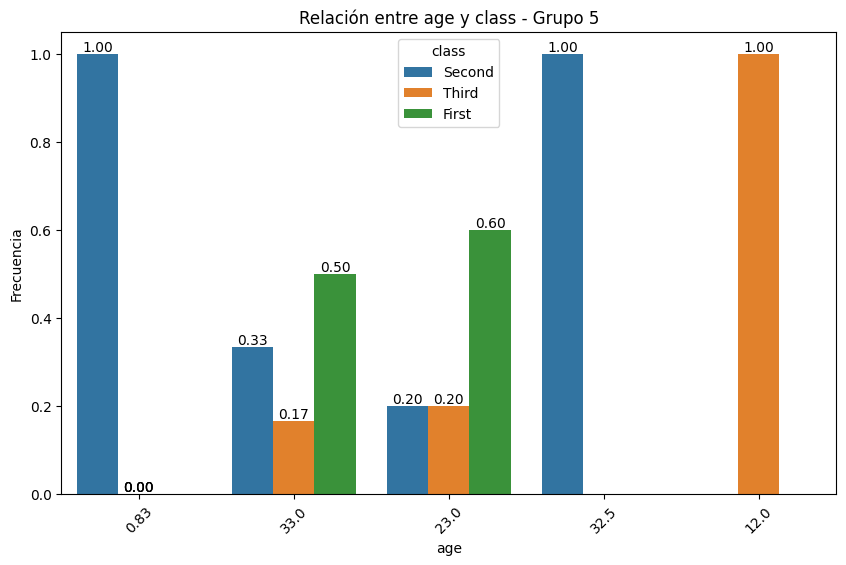

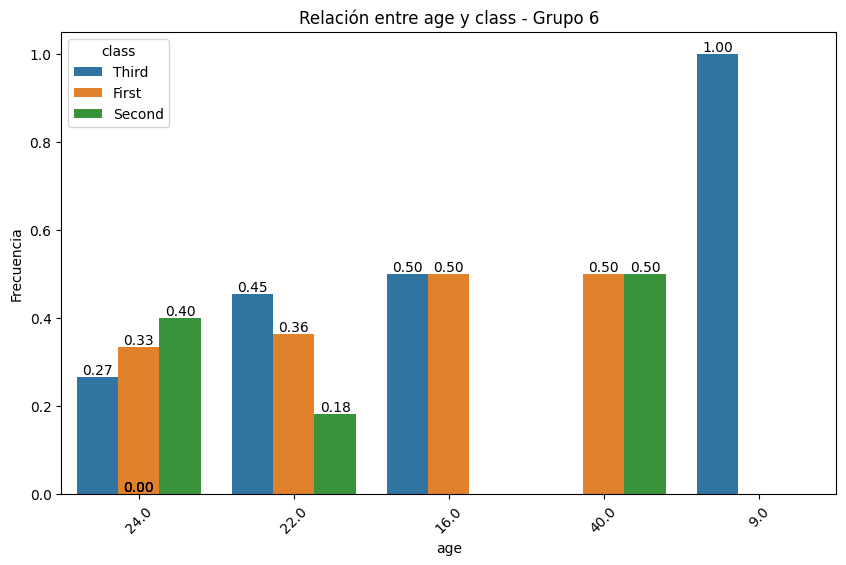

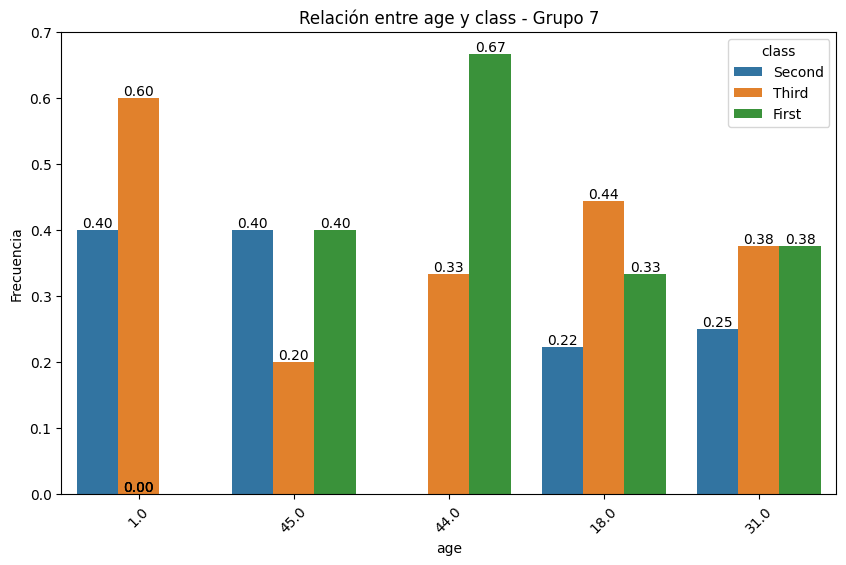

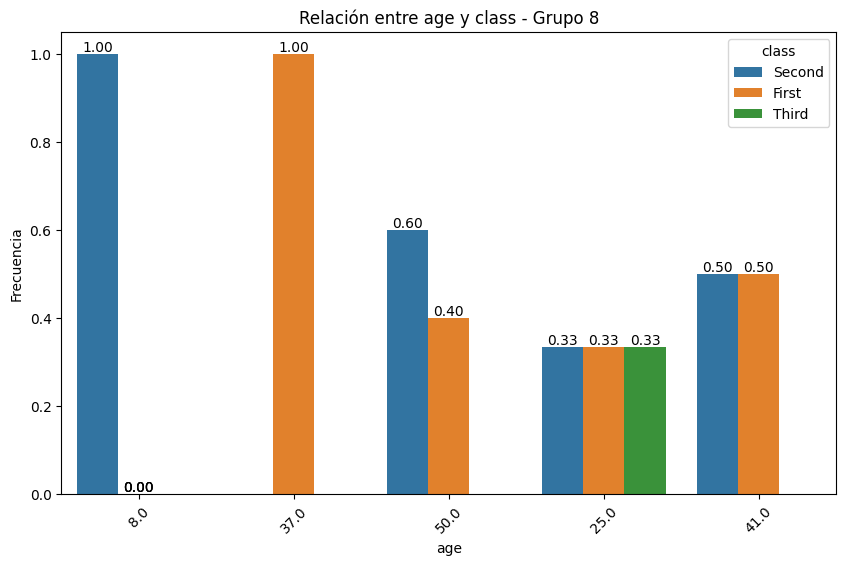

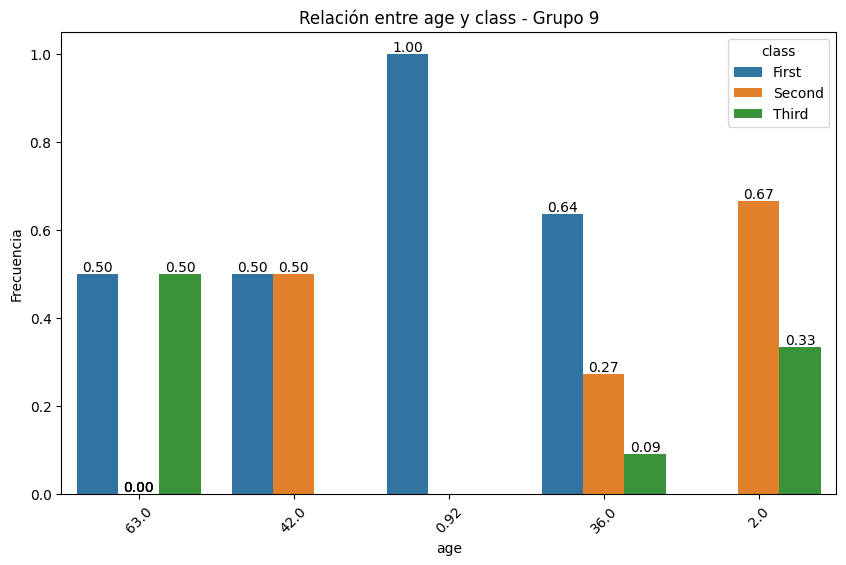

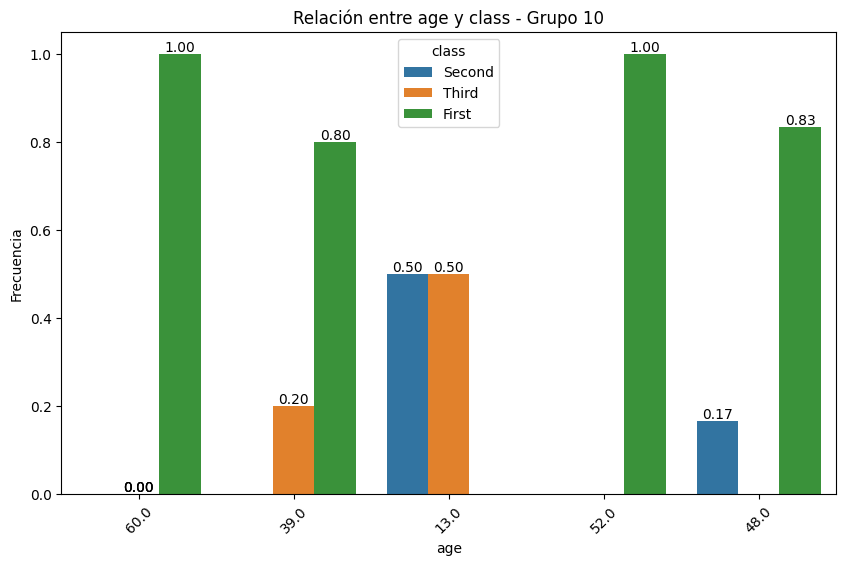

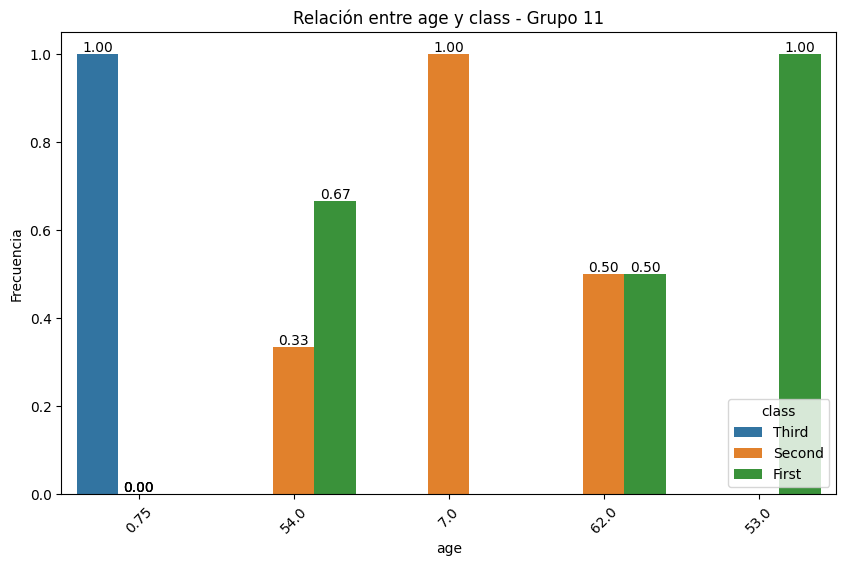

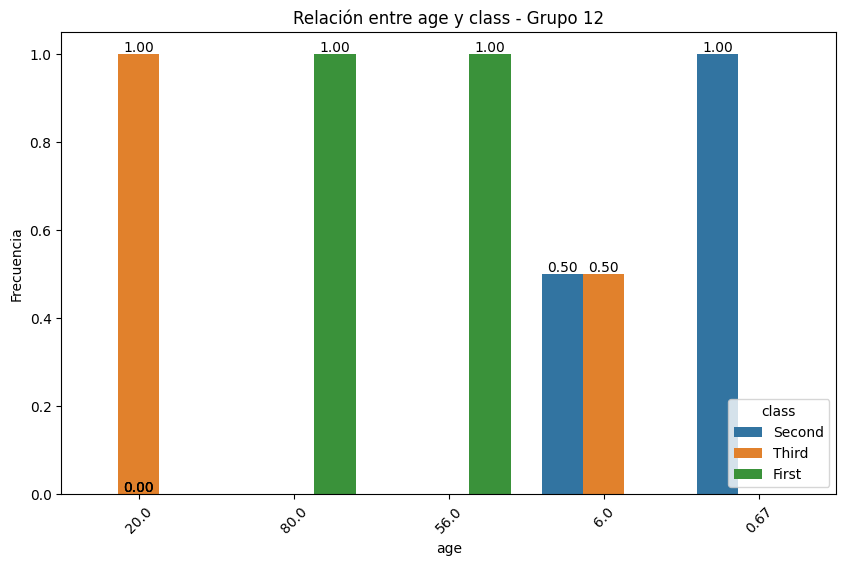

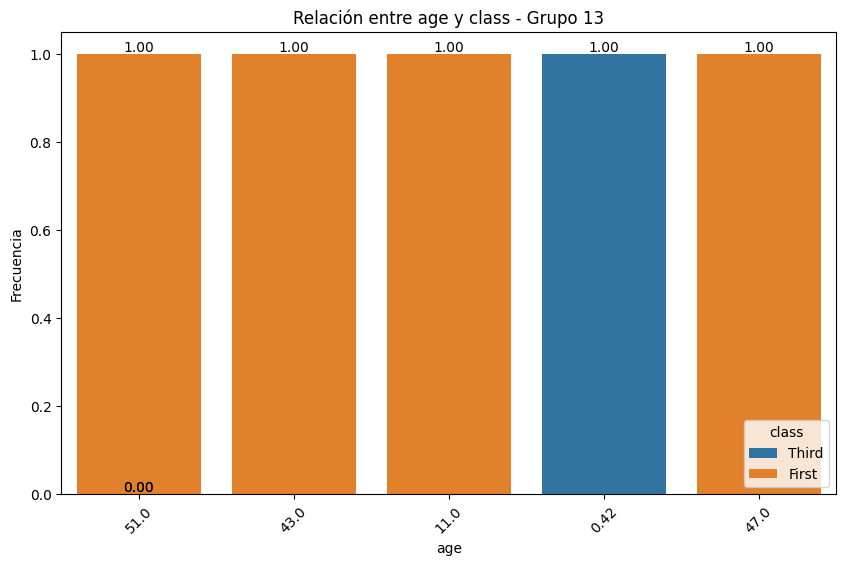

In [63]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

**8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. 
¿Qué puedes decir al respecto?**

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?